In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("/content/DatasetMO - Sheet1 (1).csv")  # dataset path

# Define target variable
target_var = "Total Sales"  # Replace with your target variable column name
Months = "Month"
# Define variables to be selected
vars_to_select = dataset.columns[dataset.columns != target_var]
vars_to_select = dataset.columns[dataset.columns != Months]


# Define objective function (MAPE)
def objective_func(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Define Linear Regression evaluation function
def eval_linear_regression(features):
    X = dataset[features]
    y = dataset[target_var]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return objective_func(y, y_pred)

# Define XGBoost Regression evaluation function
def eval_xgboost_regression(features):
    X = dataset[features]
    y = dataset[target_var]
    model = XGBRegressor()
    model.fit(X, y)
    y_pred = model.predict(X)
    return objective_func(y, y_pred)





In [53]:
data = pd.read_csv('/content/DatasetMO - Sheet1 (1).csv')


In [54]:
data

,Month,Budget Pacing,Stop Over-spend,Impression,Click,CTR,Spend,CPC,Sales,Orders,...,Units Ordered - B2B,Total Order Items,Total Order Items - B2B,Units Refunded,Refund Rate,Feedback Received,Negative Feedback Received,Received Negative Feedback Rate,A-to-z Claims Granted,Claims Amount
0,3/23/2023,False,False,4526056.0,24454.0,0.54,19805.24,0.80,66047.50,2619.0,...,301.0,5796.0,178.0,326.0,5.24,22.0,0.0,0.00,0.0,0.0
1,2/23/2023,False,False,6757407.0,38109.0,0.56,32002.17,0.83,114118.85,4339.0,...,542.0,9069.0,273.0,602.0,6.14,31.0,0.0,0.00,0.0,0.0
2,1/23/2023,False,False,6279847.0,33609.0,0.54,26592.20,0.79,110003.25,4170.0,...,563.0,9386.0,272.0,938.0,9.26,48.0,0.0,0.00,0.0,0.0
3,12/22/2023,False,False,11202780.0,47189.0,0.42,35176.59,0.74,178446.77,6920.0,...,537.0,16497.0,334.0,895.0,4.97,40.0,0.0,0.00,0.0,0.0
4,11/22/2023,False,False,11629057.0,50774.0,0.44,41689.91,0.82,171948.12,6633.0,...,461.0,13763.0,324.0,771.0,5.19,29.0,1.0,3.45,0.0,0.0
5,10/22/2023,False,False,12671199.0,57032.0,0.45,46615.06,0.81,186611.67,6943.0,...,411.0,11750.0,270.0,855.0,6.79,25.0,0.0,0.00,0.0,0.0
6,9/22/2023,False,False,9306821.0,48393.0,0.52,32685.75,0.67,174344.89,6205.0,...,806.0,10846.0,323.0,789.0,6.62,32.0,0.0,0.00,0.0,0.0
7,8/22/2023,False,False,11756057.0,60640.0,0.52,52202.98,0.86,188170.72,6844.0,...,803.0,11610.0,351.0,761.0,6.02,26.0,0.0,0.00,0.0,0.0
8,7/22/2023,False,False,10538240.0,45838.0,0.43,45761.14,0.99,162853.60,6087.0,...,458.0,9671.0,193.0,607.0,5.84,24.0,0.0,0.00,0.0,0.0
9,6/22/2023,False,False,7166405.0,35068.0,0.49,31929.75,0.91,144397.65,5249.0,...,465.0,9055.0,208.0,608.0,6.13,18.0,0.0,0.00,0.0,0.0


In [55]:
columns_to_drop = ['Refund Rate']
data = data.drop(columns_to_drop, axis=1)

In [56]:
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns


In [57]:
for col in non_numeric_cols:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'Month': ['3/23/2023' '2/23/2023' '1/23/2023' '12/22/2023' '11/22/2023'
 '10/22/2023' '9/22/2023' '8/22/2023' '7/22/2023' '6/22/2023' '5/22/2023'
 '4/22/2023' '3/22/2023' '2/22/2023' '1/22/2023' '12/21/2023' '11/21/2023'
 '10/21/2023' '9/21/2023' '8/21/2023' '7/21/2023' '6/21/2023' '5/21/2023'
 '4/21/2023' '3/21/2023']
Unique values in column 'Budget Pacing': [False]
Unique values in column 'Stop Over-spend': [False]


In [58]:
vars_to_select

Index(['Budget Pacing', 'Stop Over-spend', 'Impression', 'Click', 'CTR',
       'Spend', 'CPC', 'Sales', 'Orders', 'CVR', 'ACOS', 'NTB-Orders',
       'NTB-OrdersPercentage', 'NTB-OrderRate', 'NTB-Sales',
       'NTB-SalesPercentage', 'Total Sales', 'Ordered Product Sales - B2B',
       'Units Ordered', 'Units Ordered - B2B', 'Total Order Items',
       'Total Order Items - B2B', 'Units Refunded', 'Refund Rate',
       'Feedback Received', 'Negative Feedback Received',
       'Received Negative Feedback Rate', 'A-to-z Claims Granted',
       'Claims Amount'],
      dtype='object')

Generation: 1 Best Objective: 6.169087684358284e-17
Generation: 2 Best Objective: 6.169087684358284e-17
Generation: 3 Best Objective: 6.169087684358284e-17
Generation: 4 Best Objective: 5.886369597912377e-17
Generation: 5 Best Objective: 5.886369597912377e-17
Generation: 6 Best Objective: 5.886369597912377e-17
Generation: 7 Best Objective: 5.691209530482657e-17
Generation: 8 Best Objective: 5.691209530482657e-17
Generation: 9 Best Objective: 5.691209530482657e-17
Generation: 10 Best Objective: 4.980189701617121e-17
Generation: 11 Best Objective: 4.980189701617121e-17
Generation: 12 Best Objective: 4.980189701617121e-17
Generation: 13 Best Objective: 4.980189701617121e-17
Generation: 14 Best Objective: 4.980189701617121e-17
Generation: 15 Best Objective: 4.980189701617121e-17
Generation: 16 Best Objective: 4.980189701617121e-17
Generation: 17 Best Objective: 4.980189701617121e-17
Generation: 18 Best Objective: 4.980189701617121e-17
Generation: 19 Best Objective: 4.980189701617121e-17
Ge

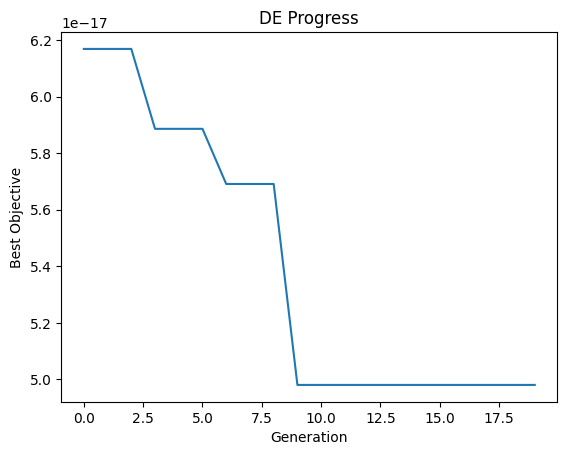

Best Features: Index(['Orders', 'NTB-Orders', 'NTB-OrdersPercentage', 'NTB-Sales',
       'Total Sales', 'Ordered Product Sales - B2B', 'Total Order Items - B2B',
       'Units Refunded', 'Refund Rate', 'A-to-z Claims Granted'],
      dtype='object')
Best Objective: 4.980189701617121e-17


In [59]:
# Define Differential Evolution Algorithm function
def DE(F, CR, NP, generations, vars_to_select, eval_func):
    # Initialize population
    pop = np.random.choice([True, False], size=(NP, len(vars_to_select)), replace=True)

    # Evaluate initial population
    obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=pop)

    # Record the best individual and its objective value
    best_ind = pop[np.argmin(obj)]
    best_obj = np.min(obj)

    # Start iteration
    progress = []
    for gen in range(generations):
        # Generate new population
        new_pop = np.copy(pop)
        for j in range(NP):
            # Select three random individuals from the population
            ind = np.random.choice(NP, size=4, replace=False)

            # Generate trial vector
            trial = np.logical_xor(best_ind, np.logical_xor(F * np.logical_xor(pop[ind[0], :], pop[ind[1], :]), F * np.logical_xor(pop[ind[2], :], pop[ind[3], :]))).astype(bool)


            # Convert trial vector back to boolean
            trial = trial.astype(bool)

            # Ensure that trial vector is within bounds [0, 1]
            trial = np.clip(trial, 0, 1)

            # Crossover
            cross = np.random.rand(len(vars_to_select)) < CR

            # Update new population
            new_pop[j, cross] = trial[cross]

        # Evaluate new population
        new_obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=new_pop)

        # Replace population with new population if objective value improves
        idx = new_obj < obj
        pop[idx, :] = new_pop[idx, :]
        obj[idx] = new_obj[idx]

        # Record the best individual and its objective value
        if np.min(new_obj) < best_obj:
            best_obj = np.min(new_obj)
            best_ind = pop[np.argmin(new_obj)]

        # Print progress
        print("Generation:", gen + 1, "Best Objective:", best_obj)

        # Store progress for plotting
        progress.append(best_obj)

    # Generate plots
    plt.plot(progress)
    plt.xlabel("Generation")
    plt.ylabel("Best Objective")
    plt.title("DE Progress")
    plt.show()

    # Return best individual and its objective value
    return best_ind, best_obj

# Example usage
F = 0.7
CR = 0.9
NP = 50
generations = 20
eval_func = eval_linear_regression

best_features, best_objective = DE(F, CR, NP, generations, vars_to_select, eval_func)
print("Best Features:", vars_to_select[best_features])
print("Best Objective:", best_objective)





In [60]:
selected_features = best_features

In [61]:
selected_features

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True, False])

In [62]:
!pip install scikit-learn xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:


# Load your dataset (assuming it's stored in a DataFrame called 'dataset')

# Define the selected features
selected_features = ['Budget Pacing', 'Spend', 'CPC', 'Sales', 'Orders', 'NTB-OrdersPercentage', 'NTB-OrderRate', 'NTB-SalesPercentage',
        'Total Order Items', 'Refund Rate', 'Claims Amount']

# Define the target variable
target_var = 'Total Sales'

# Split the dataset into training and testing sets
train_data = dataset[5:24]  # Training data
test_data = dataset[0:5]  # Testing data

# Prepare the training and testing datasets
X_train = train_data[selected_features]
y_train = train_data[target_var]
X_test = test_data[selected_features]
y_test = test_data[target_var]

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions using the Linear Regression model
lr_y_pred = lr_model.predict(X_test)

# Calculate MAPE for Linear Regression model
lr_mape = mean_absolute_percentage_error(y_test, lr_y_pred)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions using the XGBoost model
xgb_y_pred = xgb_model.predict(X_test)

# Calculate MAPE for XGBoost model
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)

# Print the MAPE for both models
print("Linear Regression MAPE:", lr_mape)
print("XGBoost MAPE:", xgb_mape)


Linear Regression MAPE: 0.10648878667809492
XGBoost MAPE: 0.12898722802507154


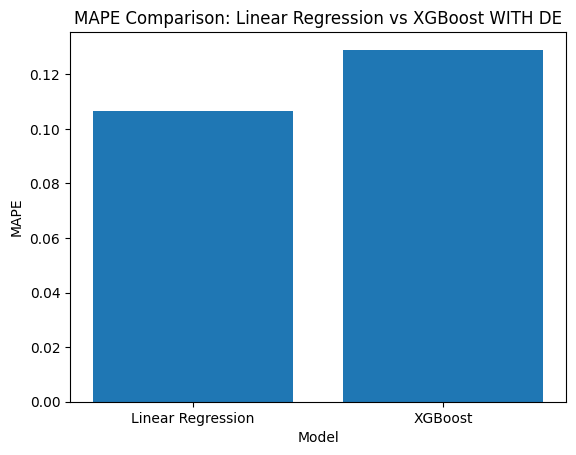

In [34]:
import matplotlib.pyplot as plt

# Calculate MAPE for Linear Regression model
lr_mape = mean_absolute_percentage_error(y_test, lr_y_pred)

# Calculate MAPE for XGBoost model
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)

# Create a bar plot of MAPE values
models = ['Linear Regression', 'XGBoost']
mape_values = [lr_mape, xgb_mape]

plt.bar(models, mape_values)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('MAPE Comparison: Linear Regression vs XGBoost WITH DE')
plt.show()


In [16]:
train_data

,Month,Budget Pacing,Stop Over-spend,Impression,Click,CTR,Spend,CPC,Sales,Orders,...,Units Ordered - B2B,Total Order Items,Total Order Items - B2B,Units Refunded,Refund Rate,Feedback Received,Negative Feedback Received,Received Negative Feedback Rate,A-to-z Claims Granted,Claims Amount
5,10/22/2023,False,False,12671199.0,57032.0,0.45,46615.06,0.81,186611.67,6943.0,...,411.0,11750.0,270.0,855.0,6.79,25.0,0.0,0.00,0.0,0.0
6,9/22/2023,False,False,9306821.0,48393.0,0.52,32685.75,0.67,174344.89,6205.0,...,806.0,10846.0,323.0,789.0,6.62,32.0,0.0,0.00,0.0,0.0
7,8/22/2023,False,False,11756057.0,60640.0,0.52,52202.98,0.86,188170.72,6844.0,...,803.0,11610.0,351.0,761.0,6.02,26.0,0.0,0.00,0.0,0.0
8,7/22/2023,False,False,10538240.0,45838.0,0.43,45761.14,0.99,162853.60,6087.0,...,458.0,9671.0,193.0,607.0,5.84,24.0,0.0,0.00,0.0,0.0
9,6/22/2023,False,False,7166405.0,35068.0,0.49,31929.75,0.91,144397.65,5249.0,...,465.0,9055.0,208.0,608.0,6.13,18.0,0.0,0.00,0.0,0.0
10,5/22/2023,False,False,7867797.0,35935.0,0.46,34412.46,0.95,184921.93,7030.0,...,377.0,9886.0,248.0,635.0,5.86,29.0,0.0,0.00,0.0,0.0
11,4/22/2023,False,False,7461326.0,33592.0,0.45,33810.34,1.00,192396.99,7275.0,...,505.0,9833.0,327.0,696.0,6.60,33.0,0.0,0.00,0.0,0.0
12,3/22/2023,False,False,10610563.0,39992.0,0.38,45962.99,1.14,242045.03,9145.0,...,477.0,10987.0,305.0,667.0,5.67,30.0,0.0,0.00,0.0,0.0
13,2/22/2023,False,False,11300555.0,38806.0,0.34,48307.64,1.24,196068.82,7088.0,...,436.0,8551.0,209.0,548.0,5.88,24.0,0.0,0.00,0.0,0.0
14,1/22/2023,False,False,12336815.0,36222.0,0.29,50189.12,1.38,180940.03,6859.0,...,434.0,8483.0,294.0,745.0,8.28,19.0,0.0,0.00,0.0,0.0


In [17]:
test_data

,Month,Budget Pacing,Stop Over-spend,Impression,Click,CTR,Spend,CPC,Sales,Orders,...,Units Ordered - B2B,Total Order Items,Total Order Items - B2B,Units Refunded,Refund Rate,Feedback Received,Negative Feedback Received,Received Negative Feedback Rate,A-to-z Claims Granted,Claims Amount
0,3/23/2023,False,False,4526056.0,24454.0,0.54,19805.24,0.80,66047.50,2619.0,...,301.0,5796.0,178.0,326.0,5.24,22.0,0.0,0.00,0.0,0.0
1,2/23/2023,False,False,6757407.0,38109.0,0.56,32002.17,0.83,114118.85,4339.0,...,542.0,9069.0,273.0,602.0,6.14,31.0,0.0,0.00,0.0,0.0
2,1/23/2023,False,False,6279847.0,33609.0,0.54,26592.20,0.79,110003.25,4170.0,...,563.0,9386.0,272.0,938.0,9.26,48.0,0.0,0.00,0.0,0.0
3,12/22/2023,False,False,11202780.0,47189.0,0.42,35176.59,0.74,178446.77,6920.0,...,537.0,16497.0,334.0,895.0,4.97,40.0,0.0,0.00,0.0,0.0
4,11/22/2023,False,False,11629057.0,50774.0,0.44,41689.91,0.82,171948.12,6633.0,...,461.0,13763.0,324.0,771.0,5.19,29.0,1.0,3.45,0.0,0.0


In [35]:
my_array = xgb_y_pred
df_XGBPredicted=pd.DataFrame(my_array, columns=['XGB Predicted Sales'])
print(df_XGBPredicted)

   XGB Predicted Sales
0        200916.812500
1        244508.984375
2        261183.609375
3        324369.437500
4        324659.750000


In [36]:
my_array2=lr_y_pred
df_LRPredicted=pd.DataFrame(my_array2, columns=['LR Predicted Sales'])
print(df_LRPredicted)

   LR Predicted Sales
0       176202.805621
1       258138.738036
2       264731.377832
3       459225.070177
4       375411.226388


In [37]:
MS = ['Month', 'Total Sales']
df_MS = dataset[MS].head(5)
print(df_MS)

        Month  Total Sales
0   3/23/2023    149394.51
1   2/23/2023    242058.68
2   1/23/2023    251351.12
3  12/22/2023    399344.30
4  11/22/2023    346516.55


In [38]:

# Assuming you have three DataFrames named df1, df2, and df3
df1 = pd.DataFrame({'Month': ['3/23/2023', '2/23/2023', '1/23/2023', '12/22/2023', '11/22/2023'],
                    'Total Sales': [149394.51, 242058.68, 251351.12, 399344.30, 346516.55]})
df2 = pd.DataFrame({'LR Predicted Sales': [176202.805621, 258138.738036, 264731.377832, 459225.070177, 375411.226388]})
df3 = pd.DataFrame({'XGB Predicted Sales': [200916.812500, 244508.984375, 261183.609375, 324369.437500, 324659.750000]})

# Reset indexes of df2 and df3
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df_combined = pd.concat([df1, df2, df3], axis=1)

# Print the combined DataFrame
print(df_combined)


        Month  Total Sales  LR Predicted Sales  XGB Predicted Sales
0   3/23/2023    149394.51       176202.805621        200916.812500
1   2/23/2023    242058.68       258138.738036        244508.984375
2   1/23/2023    251351.12       264731.377832        261183.609375
3  12/22/2023    399344.30       459225.070177        324369.437500
4  11/22/2023    346516.55       375411.226388        324659.750000


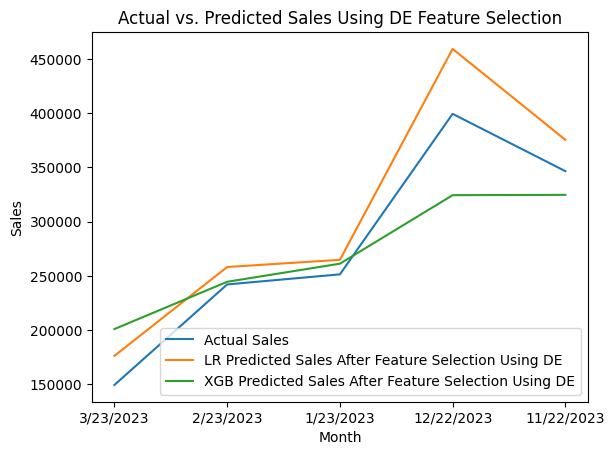

In [39]:

# Create a line plot
plt.plot(df_combined['Month'], df_combined['Total Sales'], label='Actual Sales')
plt.plot(df_combined['Month'], df_combined['LR Predicted Sales'], label='LR Predicted Sales After Feature Selection Using DE')
plt.plot(df_combined['Month'], df_combined['XGB Predicted Sales'], label='XGB Predicted Sales After Feature Selection Using DE')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales Using DE Feature Selection')

# Display the legend
plt.legend()

# Show the plot
plt.show()


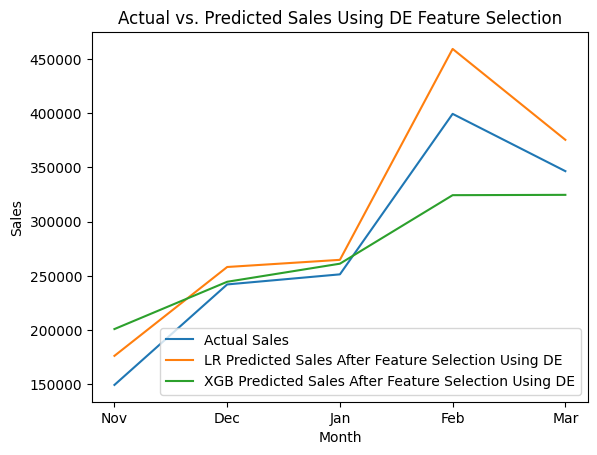

In [23]:

# Create a line plot
plt.plot(df_combined['Month'], df_combined['Total Sales'], label='Actual Sales')
plt.plot(df_combined['Month'], df_combined['LR Predicted Sales'], label='LR Predicted Sales After Feature Selection Using DE')
plt.plot(df_combined['Month'], df_combined['XGB Predicted Sales'], label='XGB Predicted Sales After Feature Selection Using DE')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales Using DE Feature Selection')

# Reverse the horizontal axis

# Set the tick labels for the horizontal axis
tick_labels = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
plt.xticks(df_combined['Month'], tick_labels)

# Display the legend
plt.legend()

# Show the plot
plt.show()


Generation: 1 Best Objective: 7.175205197170696e-17
Generation: 2 Best Objective: 5.807431385345987e-17
Generation: 3 Best Objective: 5.807431385345987e-17
Generation: 4 Best Objective: 5.807431385345987e-17
Generation: 5 Best Objective: 5.807431385345987e-17
Generation: 6 Best Objective: 5.655147356695725e-17
Generation: 7 Best Objective: 3.974498185060939e-17
Generation: 8 Best Objective: 3.974498185060939e-17
Generation: 9 Best Objective: 3.974498185060939e-17
Generation: 10 Best Objective: 3.974498185060939e-17
Generation: 11 Best Objective: 3.974498185060939e-17
Generation: 12 Best Objective: 3.974498185060939e-17
Generation: 13 Best Objective: 3.486253764619168e-17
Generation: 14 Best Objective: 3.486253764619168e-17
Generation: 15 Best Objective: 3.486253764619168e-17
Generation: 16 Best Objective: 3.486253764619168e-17
Generation: 17 Best Objective: 3.486253764619168e-17
Generation: 18 Best Objective: 3.486253764619168e-17
Generation: 19 Best Objective: 3.486253764619168e-17
Ge

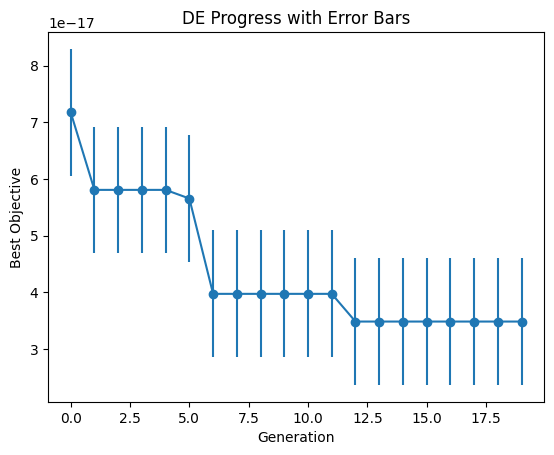

Best Features: Index(['Budget Pacing', 'Stop Over-spend', 'CTR', 'CVR', 'ACOS', 'NTB-Orders',
       'Total Sales', 'Units Ordered', 'Units Ordered - B2B',
       'Total Order Items - B2B', 'A-to-z Claims Granted'],
      dtype='object')
Best Objective: 3.486253764619168e-17


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define Differential Evolution Algorithm function
def DE(F, CR, NP, generations, vars_to_select, eval_func):
    # Initialize population
    pop = np.random.choice([True, False], size=(NP, len(vars_to_select)), replace=True)

    # Evaluate initial population
    obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=pop)

    # Record the best individual and its objective value
    best_ind = pop[np.argmin(obj)]
    best_obj = np.min(obj)

    # Start iteration
    progress = []
    for gen in range(generations):
        # Generate new population
        new_pop = np.copy(pop)
        for j in range(NP):
            # Select three random individuals from the population
            ind = np.random.choice(NP, size=4, replace=False)

            # Generate trial vector
            trial = np.logical_xor(best_ind, np.logical_xor(F * np.logical_xor(pop[ind[0], :], pop[ind[1], :]), F * np.logical_xor(pop[ind[2], :], pop[ind[3], :]))).astype(bool)

            # Convert trial vector back to boolean
            trial = trial.astype(bool)

            # Ensure that trial vector is within bounds [0, 1]
            trial = np.clip(trial, 0, 1)

            # Crossover
            cross = np.random.rand(len(vars_to_select)) < CR

            # Update new population
            new_pop[j, cross] = trial[cross]

        # Evaluate new population
        new_obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=new_pop)

        # Replace population with new population if objective value improves
        idx = new_obj < obj
        pop[idx, :] = new_pop[idx, :]
        obj[idx] = new_obj[idx]

        # Record the best individual and its objective value
        if np.min(new_obj) < best_obj:
            best_obj = np.min(new_obj)
            best_ind = pop[np.argmin(new_obj)]

        # Print progress
        print("Generation:", gen + 1, "Best Objective:", best_obj)

        # Store progress for plotting
        progress.append(best_obj)

    # Generate error bars plot
    x = np.arange(generations)
    y = np.array(progress)
    error = np.std(progress)

    plt.errorbar(x, y, yerr=error, fmt='-o')
    plt.xlabel("Generation")
    plt.ylabel("Best Objective")
    plt.title("DE Progress with Error Bars")
    plt.show()

    # Return best individual and its objective value
    return best_ind, best_obj

# Example usage
F = 0.7
CR = 0.9
NP = 50
generations = 20
eval_func = eval_linear_regression

best_features, best_objective = DE(F, CR, NP, generations, vars_to_select, eval_func)
print("Best Features:", vars_to_select[best_features])
print("Best Objective:", best_objective)


In [217]:
df_combined.to_csv('Results.csv', index=False)

# Result Before Hyper Parameter tuning

Population Size: 50 Generation: 1 Best Objective: 7.130058924088337e-17
Population Size: 50 Generation: 2 Best Objective: 7.130058924088337e-17
Population Size: 50 Generation: 3 Best Objective: 7.130058924088337e-17
Population Size: 50 Generation: 4 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 5 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 6 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 7 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 8 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 9 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 10 Best Objective: 5.453670994699144e-17
Population Size: 50 Generation: 11 Best Objective: 4.914312947415215e-17
Population Size: 50 Generation: 12 Best Objective: 4.914312947415215e-17
Population Size: 50 Generation: 13 Best Objective: 4.914312947415215e-17
Population Size: 50 Generation: 14 Best Objective: 2.3335623

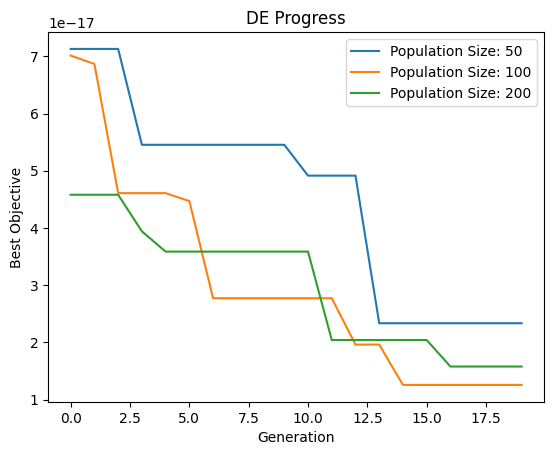

Best Features: Index(['Stop Over-spend', 'Click', 'Orders', 'NTB-Orders',
       'NTB-OrdersPercentage', 'NTB-Sales', 'Total Sales',
       'Units Ordered - B2B', 'Negative Feedback Received'],
      dtype='object')
Best Objective: 1.5767855072829176e-17


In [24]:
import numpy as np

# Define Differential Evolution Algorithm function
def DE(F, CR, population_sizes, generations, vars_to_select, eval_func):
    results = []

    for NP in population_sizes:
        # Initialize population
        pop = np.random.choice([True, False], size=(NP, len(vars_to_select)), replace=True)

        # Evaluate initial population
        obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=pop)

        # Record the best individual and its objective value
        best_ind = pop[np.argmin(obj)]
        best_obj = np.min(obj)

        # Start iteration
        progress = []
        for gen in range(generations):
            # Generate new population
            new_pop = np.copy(pop)
            for j in range(NP):
                # Select three random individuals from the population
                ind = np.random.choice(NP, size=4, replace=False)

                # Generate trial vector
                trial = np.logical_xor(best_ind, np.logical_xor(F * np.logical_xor(pop[ind[0], :], pop[ind[1], :]), F * np.logical_xor(pop[ind[2], :], pop[ind[3], :]))).astype(bool)

                # Convert trial vector back to boolean
                trial = trial.astype(bool)

                # Ensure that trial vector is within bounds [0, 1]
                trial = np.clip(trial, 0, 1)

                # Crossover
                cross = np.random.rand(len(vars_to_select)) < CR

                # Update new population
                new_pop[j, cross] = trial[cross]

            # Evaluate new population
            new_obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=new_pop)

            # Replace population with new population if objective value improves
            idx = new_obj < obj
            pop[idx, :] = new_pop[idx, :]
            obj[idx] = new_obj[idx]

            # Record the best individual and its objective value
            if np.min(new_obj) < best_obj:
                best_obj = np.min(new_obj)
                best_ind = pop[np.argmin(new_obj)]

            # Print progress
            print("Population Size:", NP, "Generation:", gen + 1, "Best Objective:", best_obj)

            # Store progress for plotting
            progress.append(best_obj)

        results.append(progress)

    # Generate plots
    for i, NP in enumerate(population_sizes):
        plt.plot(results[i], label=f"Population Size: {NP}")

    plt.xlabel("Generation")
    plt.ylabel("Best Objective")
    plt.title("DE Progress")
    plt.legend()
    plt.show()

    # Return best individual and its objective value
    return best_ind, best_obj

# Example usage
F = 0.9
CR = 0.9
population_sizes = [50, 100, 200]
generations = 20
eval_func = eval_linear_regression

best_features, best_objective = DE(F, CR, population_sizes, generations, vars_to_select, eval_func)
print("Best Features:", vars_to_select[best_features])
print("Best Objective:", best_objective)


# Result after Hyperparameter Tuning

Population Size: 50 Generation: 1 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 2 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 3 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 4 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 5 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 6 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 7 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 8 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 9 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 10 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 11 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 12 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 13 Best Objective: 2.1579934741490436e-17
Population Size: 50 Generation: 14 Best Objecti

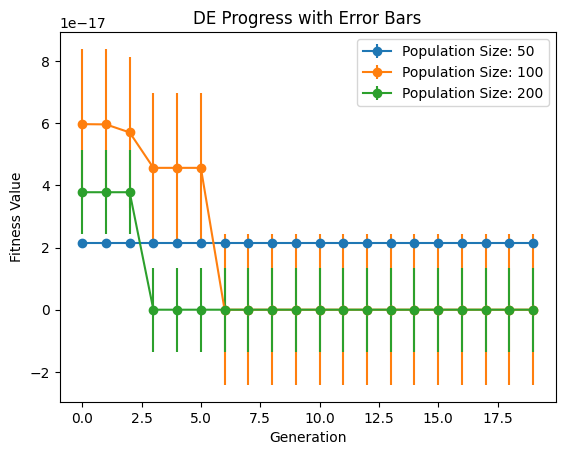

Best Features: Index(['Click', 'CTR', 'ACOS', 'NTB-OrdersPercentage', 'NTB-Sales',
       'Total Sales', 'Refund Rate', 'Negative Feedback Received',
       'Received Negative Feedback Rate', 'A-to-z Claims Granted'],
      dtype='object')
Best Objective: 0.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define Differential Evolution Algorithm function
def DE(F, CR, population_sizes, generations, vars_to_select, eval_func):
    results = []

    for NP in population_sizes:
        # Initialize population
        pop = np.random.choice([True, False], size=(NP, len(vars_to_select)), replace=True)

        # Evaluate initial population
        obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=pop)

        # Record the best individual and its objective value
        best_ind = pop[np.argmin(obj)]
        best_obj = np.min(obj)

        # Start iteration
        progress = []
        for gen in range(generations):
            # Generate new population
            new_pop = np.copy(pop)
            for j in range(NP):
                # Select three random individuals from the population
                ind = np.random.choice(NP, size=4, replace=False)

                # Generate trial vector
                trial = np.logical_xor(best_ind, np.logical_xor(F * np.logical_xor(pop[ind[0], :], pop[ind[1], :]), F * np.logical_xor(pop[ind[2], :], pop[ind[3], :]))).astype(bool)

                # Convert trial vector back to boolean
                trial = trial.astype(bool)

                # Ensure that trial vector is within bounds [0, 1]
                trial = np.clip(trial, 0, 1)

                # Crossover
                cross = np.random.rand(len(vars_to_select)) < CR

                # Update new population
                new_pop[j, cross] = trial[cross]

            # Evaluate new population
            new_obj = np.apply_along_axis(lambda p: eval_func(vars_to_select[p]), axis=1, arr=new_pop)

            # Replace population with new population if objective value improves
            idx = new_obj < obj
            pop[idx, :] = new_pop[idx, :]
            obj[idx] = new_obj[idx]

            # Record the best individual and its objective value
            if np.min(new_obj) < best_obj:
                best_obj = np.min(new_obj)
                best_ind = pop[np.argmin(new_obj)]

            # Print progress
            print("Population Size:", NP, "Generation:", gen + 1, "Best Objective:", best_obj)

            # Store progress
            progress.append(best_obj)

        results.append(progress)

    # Generate error bar plots
    x = np.arange(generations)
    for i, NP in enumerate(population_sizes):
        y = np.array(results[i])
        error = np.std(results[i])
        plt.errorbar(x, y, yerr=error, fmt='-o', label=f"Population Size: {NP}")

    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.title("DE Progress with Error Bars")
    plt.legend()
    plt.show()

    # Return best individual and its objective value
    return best_ind, best_obj

# Example usage
F = 0.7
CR = 0.9
population_sizes = [50, 100, 200]
generations = 20
eval_func = eval_linear_regression

best_features, best_objective = DE(F, CR, population_sizes, generations, vars_to_select, eval_func)
print("Best Features:", vars_to_select[best_features])
print("Best Objective:", best_objective)


# Hyper Parameter Tuning.

Population Size: 50 Generation: 1 Best Objective: 6.31604939197431e-17
Population Size: 50 Generation: 2 Best Objective: 6.075218618562166e-17
Population Size: 50 Generation: 3 Best Objective: 4.618743506014212e-17
Population Size: 50 Generation: 4 Best Objective: 4.618743506014212e-17
Population Size: 50 Generation: 5 Best Objective: 4.618743506014212e-17
Population Size: 50 Generation: 6 Best Objective: 4.618743506014212e-17
Population Size: 50 Generation: 7 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 8 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 9 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 10 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 11 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 12 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 13 Best Objective: 1.537331141133882e-17
Population Size: 50 Generation: 14 Best Objective: 1.53733114

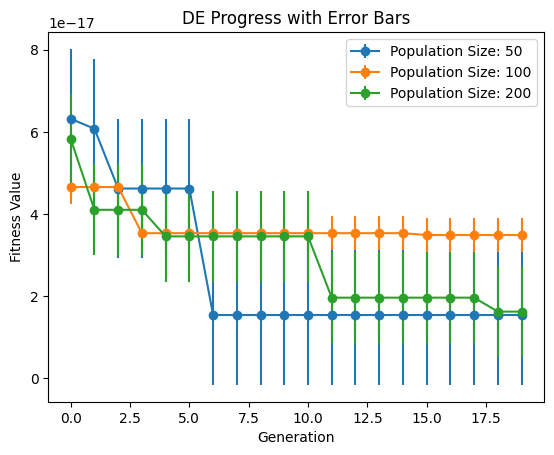

Population Size: 50 Generation: 1 Best Objective: 8.036333219702546e-17
Population Size: 50 Generation: 2 Best Objective: 8.036333219702546e-17
Population Size: 50 Generation: 3 Best Objective: 8.036333219702546e-17
Population Size: 50 Generation: 4 Best Objective: 4.991738097849287e-17
Population Size: 50 Generation: 5 Best Objective: 4.991738097849287e-17
Population Size: 50 Generation: 6 Best Objective: 4.991738097849287e-17
Population Size: 50 Generation: 7 Best Objective: 4.991738097849287e-17
Population Size: 50 Generation: 8 Best Objective: 4.030569045460739e-17
Population Size: 50 Generation: 9 Best Objective: 4.030569045460739e-17
Population Size: 50 Generation: 10 Best Objective: 4.030569045460739e-17
Population Size: 50 Generation: 11 Best Objective: 4.030569045460739e-17
Population Size: 50 Generation: 12 Best Objective: 4.030569045460739e-17
Population Size: 50 Generation: 13 Best Objective: 4.030569045460739e-17
Population Size: 50 Generation: 14 Best Objective: 4.0305690

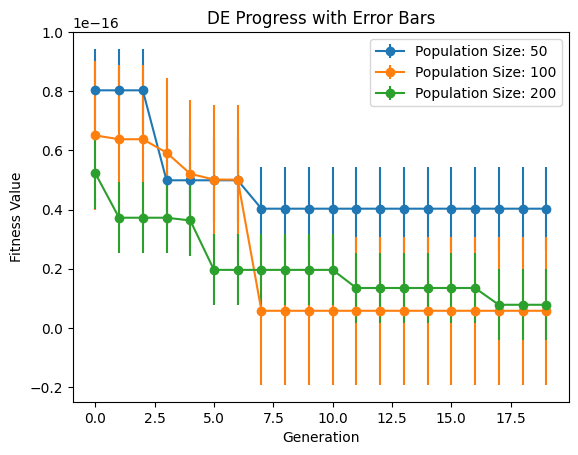

Population Size: 50 Generation: 1 Best Objective: 9.090703302085196e-17
Population Size: 50 Generation: 2 Best Objective: 6.874478401357062e-17
Population Size: 50 Generation: 3 Best Objective: 6.874478401357062e-17
Population Size: 50 Generation: 4 Best Objective: 5.0935917444840975e-17
Population Size: 50 Generation: 5 Best Objective: 5.0935917444840975e-17
Population Size: 50 Generation: 6 Best Objective: 5.0935917444840975e-17
Population Size: 50 Generation: 7 Best Objective: 5.0935917444840975e-17
Population Size: 50 Generation: 8 Best Objective: 5.0935917444840975e-17
Population Size: 50 Generation: 9 Best Objective: 3.30618301775955e-17
Population Size: 50 Generation: 10 Best Objective: 3.30618301775955e-17
Population Size: 50 Generation: 11 Best Objective: 0.0
Population Size: 50 Generation: 12 Best Objective: 0.0
Population Size: 50 Generation: 13 Best Objective: 0.0
Population Size: 50 Generation: 14 Best Objective: 0.0
Population Size: 50 Generation: 15 Best Objective: 0.0
P

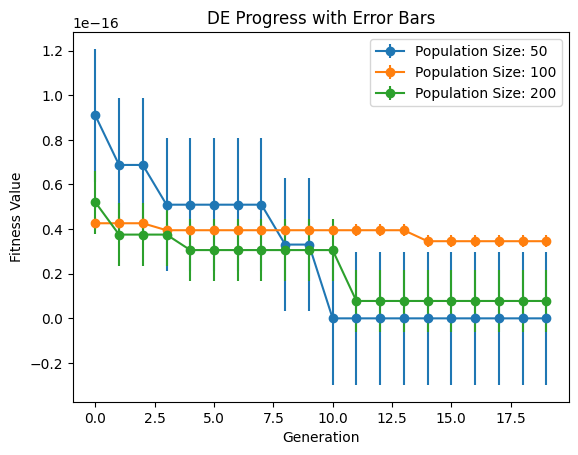

Population Size: 50 Generation: 1 Best Objective: 6.803364280951787e-17
Population Size: 50 Generation: 2 Best Objective: 6.803364280951787e-17
Population Size: 50 Generation: 3 Best Objective: 6.779234754858484e-17
Population Size: 50 Generation: 4 Best Objective: 5.130782797507024e-17
Population Size: 50 Generation: 5 Best Objective: 5.130782797507024e-17
Population Size: 50 Generation: 6 Best Objective: 5.130782797507024e-17
Population Size: 50 Generation: 7 Best Objective: 4.265501421222712e-17
Population Size: 50 Generation: 8 Best Objective: 4.265501421222712e-17
Population Size: 50 Generation: 9 Best Objective: 4.265501421222712e-17
Population Size: 50 Generation: 10 Best Objective: 4.265501421222712e-17
Population Size: 50 Generation: 11 Best Objective: 4.265501421222712e-17
Population Size: 50 Generation: 12 Best Objective: 4.265501421222712e-17
Population Size: 50 Generation: 13 Best Objective: 4.1580578758150446e-17
Population Size: 50 Generation: 14 Best Objective: 4.158057

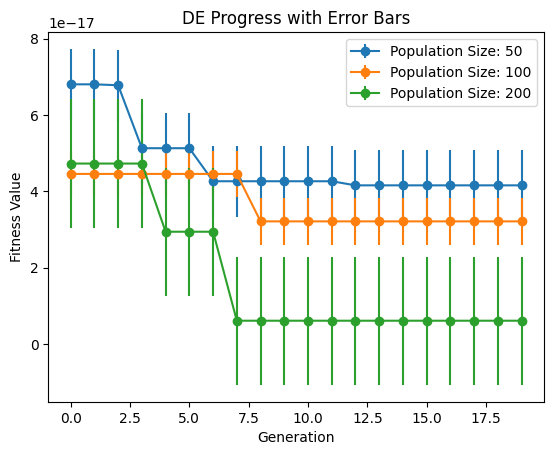

Population Size: 50 Generation: 1 Best Objective: 5.68508019544833e-17
Population Size: 50 Generation: 2 Best Objective: 5.68508019544833e-17
Population Size: 50 Generation: 3 Best Objective: 5.68508019544833e-17
Population Size: 50 Generation: 4 Best Objective: 5.68508019544833e-17
Population Size: 50 Generation: 5 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 6 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 7 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 8 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 9 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 10 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 11 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 12 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 13 Best Objective: 4.469721160836644e-17
Population Size: 50 Generation: 14 Best Objective: 4.46972116083

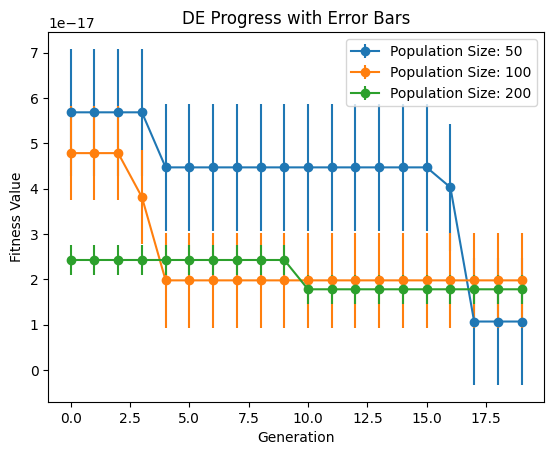

Population Size: 50 Generation: 1 Best Objective: 6.450476218536536e-17
Population Size: 50 Generation: 2 Best Objective: 6.450476218536536e-17
Population Size: 50 Generation: 3 Best Objective: 6.450476218536536e-17
Population Size: 50 Generation: 4 Best Objective: 6.450476218536536e-17
Population Size: 50 Generation: 5 Best Objective: 6.450476218536536e-17
Population Size: 50 Generation: 6 Best Objective: 6.450476218536536e-17
Population Size: 50 Generation: 7 Best Objective: 5.553726522551768e-17
Population Size: 50 Generation: 8 Best Objective: 5.553726522551768e-17
Population Size: 50 Generation: 9 Best Objective: 5.553726522551768e-17
Population Size: 50 Generation: 10 Best Objective: 5.553726522551768e-17
Population Size: 50 Generation: 11 Best Objective: 4.665573706684505e-17
Population Size: 50 Generation: 12 Best Objective: 4.665573706684505e-17
Population Size: 50 Generation: 13 Best Objective: 4.665573706684505e-17
Population Size: 50 Generation: 14 Best Objective: 4.6655737

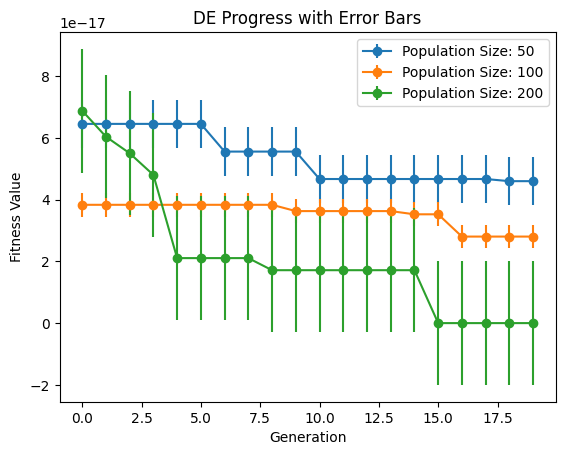

Population Size: 50 Generation: 1 Best Objective: 6.403630910583134e-17
Population Size: 50 Generation: 2 Best Objective: 6.403630910583134e-17
Population Size: 50 Generation: 3 Best Objective: 6.403630910583134e-17
Population Size: 50 Generation: 4 Best Objective: 6.403630910583134e-17
Population Size: 50 Generation: 5 Best Objective: 6.403630910583134e-17
Population Size: 50 Generation: 6 Best Objective: 5.648637315043902e-17
Population Size: 50 Generation: 7 Best Objective: 5.648637315043902e-17
Population Size: 50 Generation: 8 Best Objective: 5.648637315043902e-17
Population Size: 50 Generation: 9 Best Objective: 5.648637315043902e-17
Population Size: 50 Generation: 10 Best Objective: 5.648637315043902e-17
Population Size: 50 Generation: 11 Best Objective: 5.416864030056838e-17
Population Size: 50 Generation: 12 Best Objective: 5.416864030056838e-17
Population Size: 50 Generation: 13 Best Objective: 5.416864030056838e-17
Population Size: 50 Generation: 14 Best Objective: 5.4168640

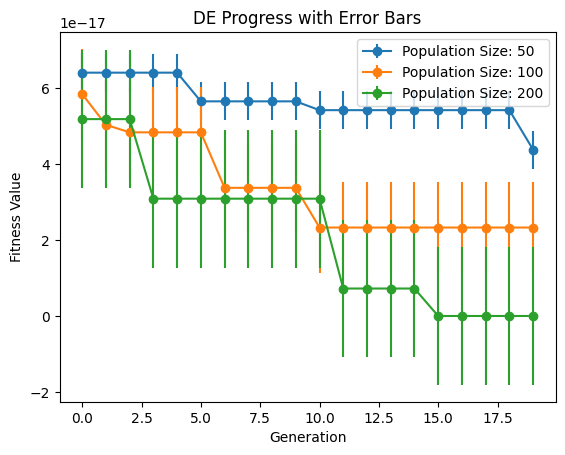

Population Size: 50 Generation: 1 Best Objective: 7.727876723275135e-17
Population Size: 50 Generation: 2 Best Objective: 7.727876723275135e-17
Population Size: 50 Generation: 3 Best Objective: 7.727876723275135e-17
Population Size: 50 Generation: 4 Best Objective: 5.434101875092221e-17
Population Size: 50 Generation: 5 Best Objective: 4.901032511237228e-17
Population Size: 50 Generation: 6 Best Objective: 4.901032511237228e-17
Population Size: 50 Generation: 7 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 8 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 9 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 10 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 11 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 12 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 13 Best Objective: 4.4329612156697255e-17
Population Size: 50 Generation: 14 Best Objective: 4.

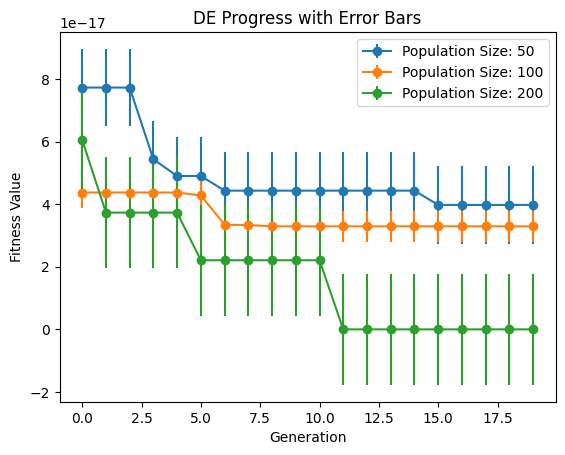

Population Size: 50 Generation: 1 Best Objective: 5.4526816614474916e-17
Population Size: 50 Generation: 2 Best Objective: 5.4526816614474916e-17
Population Size: 50 Generation: 3 Best Objective: 5.4526816614474916e-17
Population Size: 50 Generation: 4 Best Objective: 5.4526816614474916e-17
Population Size: 50 Generation: 5 Best Objective: 4.690549068157652e-17
Population Size: 50 Generation: 6 Best Objective: 4.690549068157652e-17
Population Size: 50 Generation: 7 Best Objective: 4.690549068157652e-17
Population Size: 50 Generation: 8 Best Objective: 4.690549068157652e-17
Population Size: 50 Generation: 9 Best Objective: 3.761326556041577e-17
Population Size: 50 Generation: 10 Best Objective: 3.761326556041577e-17
Population Size: 50 Generation: 11 Best Objective: 3.761326556041577e-17
Population Size: 50 Generation: 12 Best Objective: 3.761326556041577e-17
Population Size: 50 Generation: 13 Best Objective: 3.761326556041577e-17
Population Size: 50 Generation: 14 Best Objective: 3.761

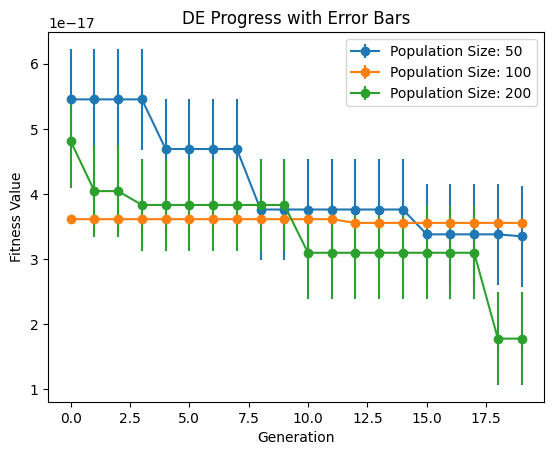

Best F: 0.7
Best CR: 0.9
Best Objective: 0.0


In [26]:
# Define the ranges of hyperparameters for grid search
F_values = [0.5, 0.7, 0.9]
CR_values = [0.5, 0.7, 0.9]

# Define a variable to track the best objective value
best_objective = float('inf')

# Define variables to store the best hyperparameters
best_F = None
best_CR = None

# Perform hyperparameter tuning
for F in F_values:
    for CR in CR_values:
        # Perform DE algorithm with current hyperparameters
        _, objective = DE(F, CR, population_sizes, generations, vars_to_select, eval_func)
        
        # Check if the current combination yields a better objective value
        if objective < best_objective:
            best_objective = objective
            best_F = F
            best_CR = CR

# Print the best hyperparameters and objective value
print("Best F:", best_F)
print("Best CR:", best_CR)
print("Best Objective:", best_objective)
